# Aim

Do a bit of reverse engineering on the Ballard (2018) data to recover its fit coefficients.

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
%matplotlib inline

In [13]:
comp03m = np.load('Completeness_0.3Msun.npy')
comp04m = np.load('Completeness_0.4Msun.npy')
comp05m = np.load('Completeness_0.5Msun.npy')
comp = np.vstack((comp03m, comp04m, comp05m))

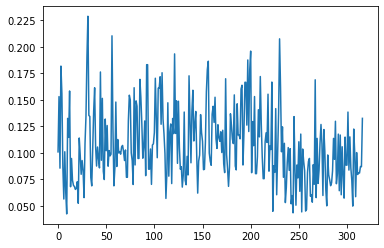

In [9]:
plt.plot(comp04m[:,9,7])

In [10]:
comp03m.shape

(353, 17, 13)

In [46]:
radius03 = np.sum(comp03m, axis=(0,2))
period03 = np.sum(comp03m, axis=(0,1))
radius04 = np.sum(comp04m, axis=(0,2))
period04 = np.sum(comp04m, axis=(0,1))
radius05 = np.sum(comp05m, axis=(0,2))
period05 = np.sum(comp05m, axis=(0,1))
period_buckets = np.exp(np.linspace(-0.22, 5.77, 13))
radius_buckets = np.exp(np.linspace(-1.22, 1.33, 17))

In [47]:
def comp_fit(x, a1, a2, a3, a4):
    return a4 + a1 * x + a1 * a2 * x ** 2 + (a1/3) * (a2 ** 2 + a3 ** 2) * x ** 3

In [52]:
for ind, period, radius in [(3, period03, radius03), (4, period04, radius04), (5, period05, radius05)]:
    for fname, field, x in [("period", period, period_buckets), ("radius", radius, radius_buckets)]:
        print(fname, ind)
        print(optimize.curve_fit(comp_fit, x, field, maxfev=int(1e6)))

period 3
(array([-5.73618534e+00,  1.46642786e-10, -1.03058829e-05,  1.92823638e+03]), array([[ 1.90874810e+01,  2.38475514e-02,  6.50683894e+00,
        -3.62775886e+02],
       [ 2.38475514e-02,  4.13877533e-05,  1.35357205e-02,
        -3.36841724e-01],
       [ 6.50683894e+00,  1.35357205e-02,  4.81000476e+00,
        -7.84921366e+01],
       [-3.62775886e+02, -3.36841724e-01, -7.84921366e+01,
         1.77184668e+04]]))
radius 3


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000000.

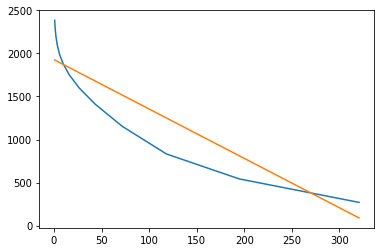

In [54]:
plt.plot(period_buckets, period03)
plt.plot(period_buckets, comp_fit(period_buckets, *[-5.73618534e+00,  1.46642786e-10, -1.03058829e-05,  1.92823638e+03]))

seems like Bayesian sampling is actually needed, and we can't just reverse engineer the coefficients from this.